# INTERNSHIP TASK -4 MACHINE LEARNING MODEL
## IMPLEMENTATION:
    - CREATE A PREDICTIVE MODEL USING SCIKIT
    - LEARN TO CLASSIFY OR PREDICT OUTCOMES FROM A DATASET 

## Hospital Readmission Prediction
### Dataset used: Diabetes 130-US hospitals for years 1999-2008
    - Dataset size: 100000 records
    - Features: Age, gender, race, diagnoses, number of lab procedures, medications, and readmission status

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv(r"C:\Cotech internship\Model analysis project\diabetic_data.csv")
df
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

# Cleaning the dataset

In [4]:
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)  # Dropping the columns which are nearly blank. 
df = df.drop(['patient_nbr','encounter_id'], axis = 1) # Dropping columns with all unique values. 

In [5]:
df.replace('?',np.nan, inplace = True)

In [6]:
df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,68,2,28,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,33,3,18,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [25]:
# Handling the missing values of dataset
missing_counts = df.isnull().sum()
missing_percentage = (missing_counts/len(df))*100
missing_summary = pd.DataFrame({
    'Missing count': missing_counts,
    'Missing Percentage': missing_percentage.round(3)
})
pd.set_option('display.max_rows', None)
display(missing_summary)

,Missing count,Missing Percentage
race,2273,2.234
gender,0,0.000
age,0,0.000
admission_type_id,0,0.000
discharge_disposition_id,0,0.000
admission_source_id,0,0.000
time_in_hospital,0,0.000
num_lab_procedures,0,0.000
num_procedures,0,0.000
num_medications,0,0.000


In [7]:
""" From above missing summary we can safely remove rows having missing values in race, diag1, diag2, diag3
since their percentages would not affect the training dataset. """

df.dropna(subset = ['race','diag_1','diag_2','diag_3'], inplace = True)

In [8]:
""" Converting the target column which is readmitted to binary. Since we are interested in predicting patients who will be 
readmitted in <30 days."""

df['readmitted'] = df['readmitted'].apply(lambda x:1 if x == '<30' else 0)

In [9]:
df['gender'].value_counts()

gender
Female             52833
Male               45219
Unknown/Invalid        1
Name: count, dtype: int64

In [10]:
df = df[df['gender'] != 'Unknown/Invalid']
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98052 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98052 non-null  object
 1   gender                    98052 non-null  object
 2   age                       98052 non-null  object
 3   admission_type_id         98052 non-null  int64 
 4   discharge_disposition_id  98052 non-null  int64 
 5   admission_source_id       98052 non-null  int64 
 6   time_in_hospital          98052 non-null  int64 
 7   num_lab_procedures        98052 non-null  int64 
 8   num_procedures            98052 non-null  int64 
 9   num_medications           98052 non-null  int64 
 10  number_outpatient         98052 non-null  int64 
 11  number_emergency          98052 non-null  int64 
 12  number_inpatient          98052 non-null  int64 
 13  diag_1                    98052 non-null  object
 14  diag_2                    

In [36]:
medicines = df.columns[19:42]
for col in medicines:
    print(df[col].value_counts())

metformin
No        78807
Steady    17677
Up         1017
Down        551
Name: count, dtype: int64
repaglinide
No        96529
Steady     1371
Up          107
Down         45
Name: count, dtype: int64
nateglinide
No        97361
Steady      657
Up           23
Down         11
Name: count, dtype: int64
chlorpropamide
No        97969
Steady       76
Up            6
Down          1
Name: count, dtype: int64
glimepiride
No        93065
Steady     4488
Up          315
Down        184
Name: count, dtype: int64
acetohexamide
No        98051
Steady        1
Name: count, dtype: int64
glipizide
No        85769
Steady    10990
Up          752
Down        541
Name: count, dtype: int64
glyburide
No        87791
Steady     8932
Up          791
Down        538
Name: count, dtype: int64
tolbutamide
No        98030
Steady       22
Name: count, dtype: int64
pioglitazone
No        90955
Steady     6755
Up          227
Down        115
Name: count, dtype: int64
rosiglitazone
No        91886
Steady     590

In [12]:
cols_to_drop = [
    'chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton',
    'glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'
]

df.drop(columns=cols_to_drop, inplace=True)

In [13]:
# Encoding other medicines to numbers

med_map = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': 3
}
med_col = [
    'metformin', 'repaglinide', 'nateglinide', 'glimepiride',
    'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin'
]
for col in med_col:
    df[col] = df[col].map(med_map)

df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,0,0,0,0,0,0,2,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,0,0,1,0,0,0,0,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,0,0,0,0,0,0,2,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,0,0,1,0,0,0,1,Ch,Yes,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,0,0,0,0,0,0,1,No,Yes,0
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,...,0,1,0,0,0,0,1,Ch,Yes,0
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,...,0,0,0,1,0,0,0,No,Yes,0
8,Caucasian,Female,[80-90),2,1,4,13,68,2,28,...,0,0,1,0,0,0,1,Ch,Yes,0
9,Caucasian,Female,[90-100),3,3,4,12,33,3,18,...,0,0,0,0,0,1,1,Ch,Yes,0
10,AfricanAmerican,Female,[40-50),1,1,7,9,47,2,17,...,0,0,0,0,0,0,1,No,Yes,0


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 98052 entries, 1 to 101765
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98052 non-null  object
 1   gender                    98052 non-null  object
 2   age                       98052 non-null  object
 3   admission_type_id         98052 non-null  int64 
 4   discharge_disposition_id  98052 non-null  int64 
 5   admission_source_id       98052 non-null  int64 
 6   time_in_hospital          98052 non-null  int64 
 7   num_lab_procedures        98052 non-null  int64 
 8   num_procedures            98052 non-null  int64 
 9   num_medications           98052 non-null  int64 
 10  number_outpatient         98052 non-null  int64 
 11  number_emergency          98052 non-null  int64 
 12  number_inpatient          98052 non-null  int64 
 13  diag_1                    98052 non-null  object
 14  diag_2                    

In [14]:
df.select_dtypes(include='object').columns

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'change', 'diabetesMed'],
      dtype='object')

In [15]:
# Encoding above object columns using label and one hot encoding. 
# Ordinal and binary columns will use label encoding: gender, age, max_glu_serum, A1Cresult, change, diabetesMed
# One hot encoding for race. 

ord_col = ['gender','age','max_glu_serum','A1Cresult','change','diabetesMed']
LE = LabelEncoder()

for col in ord_col:
    df[col] = LE.fit_transform(df[col])

df = pd.get_dummies(df, columns=['race'], drop_first=True)

In [16]:
# For diagnosis columns, categorize them to ICD-9 diagnosis code.

def map_code(code):
    try:
        code = float(code)
        if (390 <= code <= 459) or (code == 785):
            return 'Circulatory'
        elif (460 <= code <= 519) or (code == 786):
            return 'Respiratory'
        elif (520 <= code <= 579) or (code == 787):
            return 'Digestive'
        elif code == 250:
            return 'Diabetes'
        elif (800 <= code <= 999):
            return 'Injury'
        elif (710 <= code <= 739):
            return 'Musculoskeletal'
        elif (580 <= code <= 629) or (code == 788):
            return 'Genitourinary'
        elif (140 <= code <= 239):
            return 'Neoplasms'
        else:
            return 'Other'
    except:
        if isinstance(code, str) and code.startswith('E'):
            return 'External'
        elif isinstance(code, str) and code.startswith('V'):
            return 'Supplementary'
        else:
            return 'Unknown'

for col in ['diag_1','diag_2','diag_3']:
    df[col] = df[col].apply(map_code)

df = pd.get_dummies(df, columns=['diag_1','diag_2','diag_3'], drop_first=True)

print(df.dtypes.value_counts())

bool     34
int64    21
int32     6
Name: count, dtype: int64


# Final review of cleaned dataset

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.dtypes.value_counts()

bool     34
int64    21
int32     6
Name: count, dtype: int64

In [19]:
df.shape

(98052, 61)

In [20]:
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,diag_3_Diabetes,diag_3_Digestive,diag_3_External,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,diag_3_Supplementary
1,0,1,1,1,7,3,59,0,18,0,...,False,False,False,False,False,False,False,True,False,False
2,0,2,1,1,7,2,11,5,13,2,...,False,False,False,False,False,False,False,False,False,True
3,1,3,1,1,7,2,44,1,16,0,...,False,False,False,False,False,False,False,False,False,False
4,1,4,1,1,7,1,51,0,8,0,...,True,False,False,False,False,False,False,False,False,False
5,1,5,2,1,2,3,31,6,16,0,...,True,False,False,False,False,False,False,False,False,False


# Model Training with Scikit-Learn

In [21]:
# Define Features and Target
X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
# Training the model using Logistic Regression

model = LogisticRegression(max_iter = 1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [24]:
# Evalute the model

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.6584059966345418
[[11785  5613]
 [ 1086  1127]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     17398
           1       0.17      0.51      0.25      2213

    accuracy                           0.66     19611
   macro avg       0.54      0.59      0.52     19611
weighted avg       0.83      0.66      0.72     19611



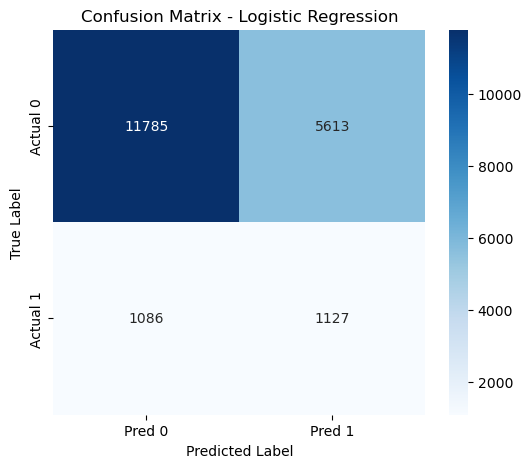

In [25]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

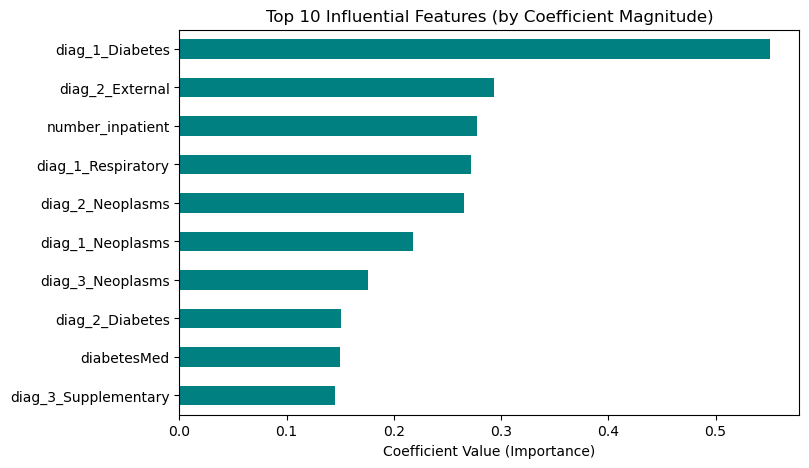

In [26]:
coeffs = pd.Series(model.coef_[0], index=X.columns)
top_feats = coeffs.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
top_feats.sort_values().plot(kind='barh', color='teal')
plt.title("Top 10 Influential Features (by Coefficient Magnitude)")
plt.xlabel("Coefficient Value (Importance)")
plt.show()

## Model Summary 

We built a Logistic Regression model with `class_weight='balanced'` to predict hospital readmission within 30 days using a processed and encoded version of the UCI Diabetes dataset. Due to severe class imbalance (majority not readmitted), class weights were applied to give more importance to the minority class. The model achieved an overall accuracy of **65.84%**, but more importantly, it obtained a **recall of 51%** for the readmitted class (class 1) — a significant improvement over default behavior, where class 1 recall was nearly zero.

The confusion matrix heatmap visualizes how the model performs across classes. It correctly predicted 11,785 non-readmissions and 1,127 readmissions, but also misclassified 5,613 non-readmitted cases as readmitted (false positives), and 1,086 actual readmitted cases as not (false negatives). This trade-off is acceptable in healthcare, where catching actual high-risk patients (true positives) is more critical than avoiding false alarms.

The top 10 influential features (based on the absolute value of logistic regression coefficients) reveal which inputs most strongly influence the model's predictions. Diagnoses related to diabetes, external causes, and respiratory issues in diag_1 and diag_2 columns are prominent. 

Additionally, number_inpatient (i.e., how often the patient has been hospitalized) and the presence of neoplasms (tumors/cancer codes) are major drivers of readmission risk. The feature diabetesMed, indicating whether diabetes medications were prescribed, also plays a meaningful role.

These insights suggest that prior diagnoses and inpatient history are key factors in predicting readmissions. The model not only performs well in detecting a meaningful portion of actual readmissions but also provides interpretable indicators that could assist clinicians in prioritizing post-discharge care and follow-ups.